# Plotting results for paper

You need to run all inference notebooks first.

In [107]:
import sys

sys.path.append("/vol/biomedic3/mb121/causal-contrastive")

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from evaluation.helper_functions import (
    extract_train_label_prop,
    extract_pretraining_type,
    extract_finetuning_type,
)

color_dict = {
    "ImageNet": sns.color_palette("colorblind", 8)[-1],
    "CF-SimCLR": sns.color_palette("colorblind", 3)[1],
    "SimCLR": sns.color_palette("colorblind", 3)[0],
    "SimCLR with CF\nin training set": sns.color_palette("colorblind", 3)[2],
}

type_error = ("se", 1)

plt_kwargs = {
    "errorbar": type_error,
    "palette": color_dict,
    "linewidth": 3,
}

training_prop = {
    "Selenia Dimensions": 89,
    "Senograph 2000D ADS_17.5": 4.4,
    "Lorad Selenia": 3.5,
    "Clearview CSm": 2.7,
    "Senographe Pristina": 0.2,
}

vindr_training_prop = {
    "(OOD) VinDr\nMammomat Inspiration": 80,
    "(OOD) VinDr\nPlanmed Nuance": 20,
}
order_dict = {
    "ImageNet": 3,
    "CF-SimCLR": 0,
    "SimCLR": 2,
    "SimCLR with CF\nin training set": 1,
}

## Mammography results

/tmp/ipykernel_3845176/1535619548.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['o'] = df3.Pretraining.apply(lambda x: order_dict[x])
/tmp/ipykernel_3845176/1535619548.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['o'] = df3.Pretraining.apply(lambda x: order_dict[x])
/tmp/ipykernel_3845176/1535619548.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

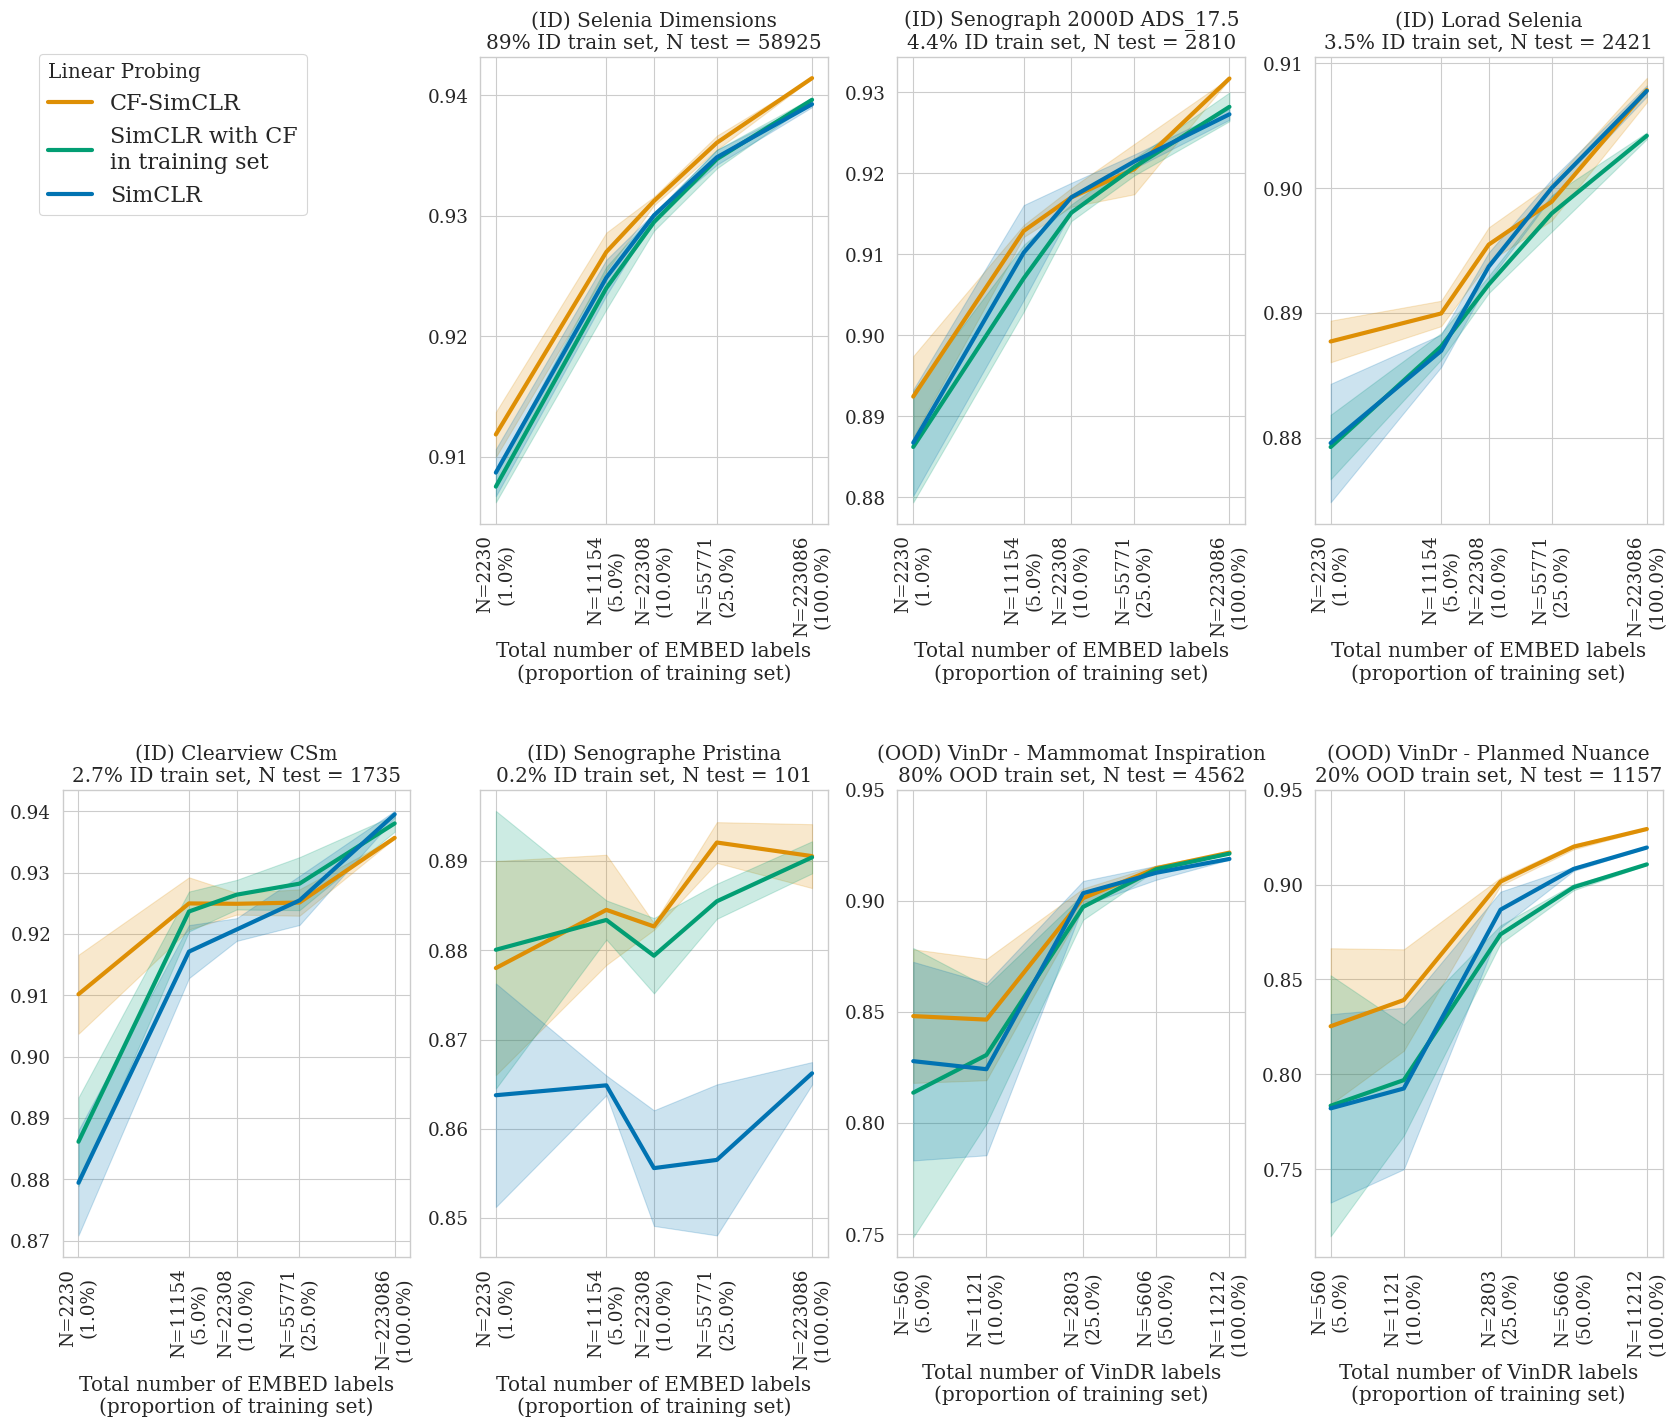

/tmp/ipykernel_3845176/1535619548.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['o'] = df3.Pretraining.apply(lambda x: order_dict[x])
/tmp/ipykernel_3845176/1535619548.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['o'] = df3.Pretraining.apply(lambda x: order_dict[x])
/tmp/ipykernel_3845176/1535619548.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

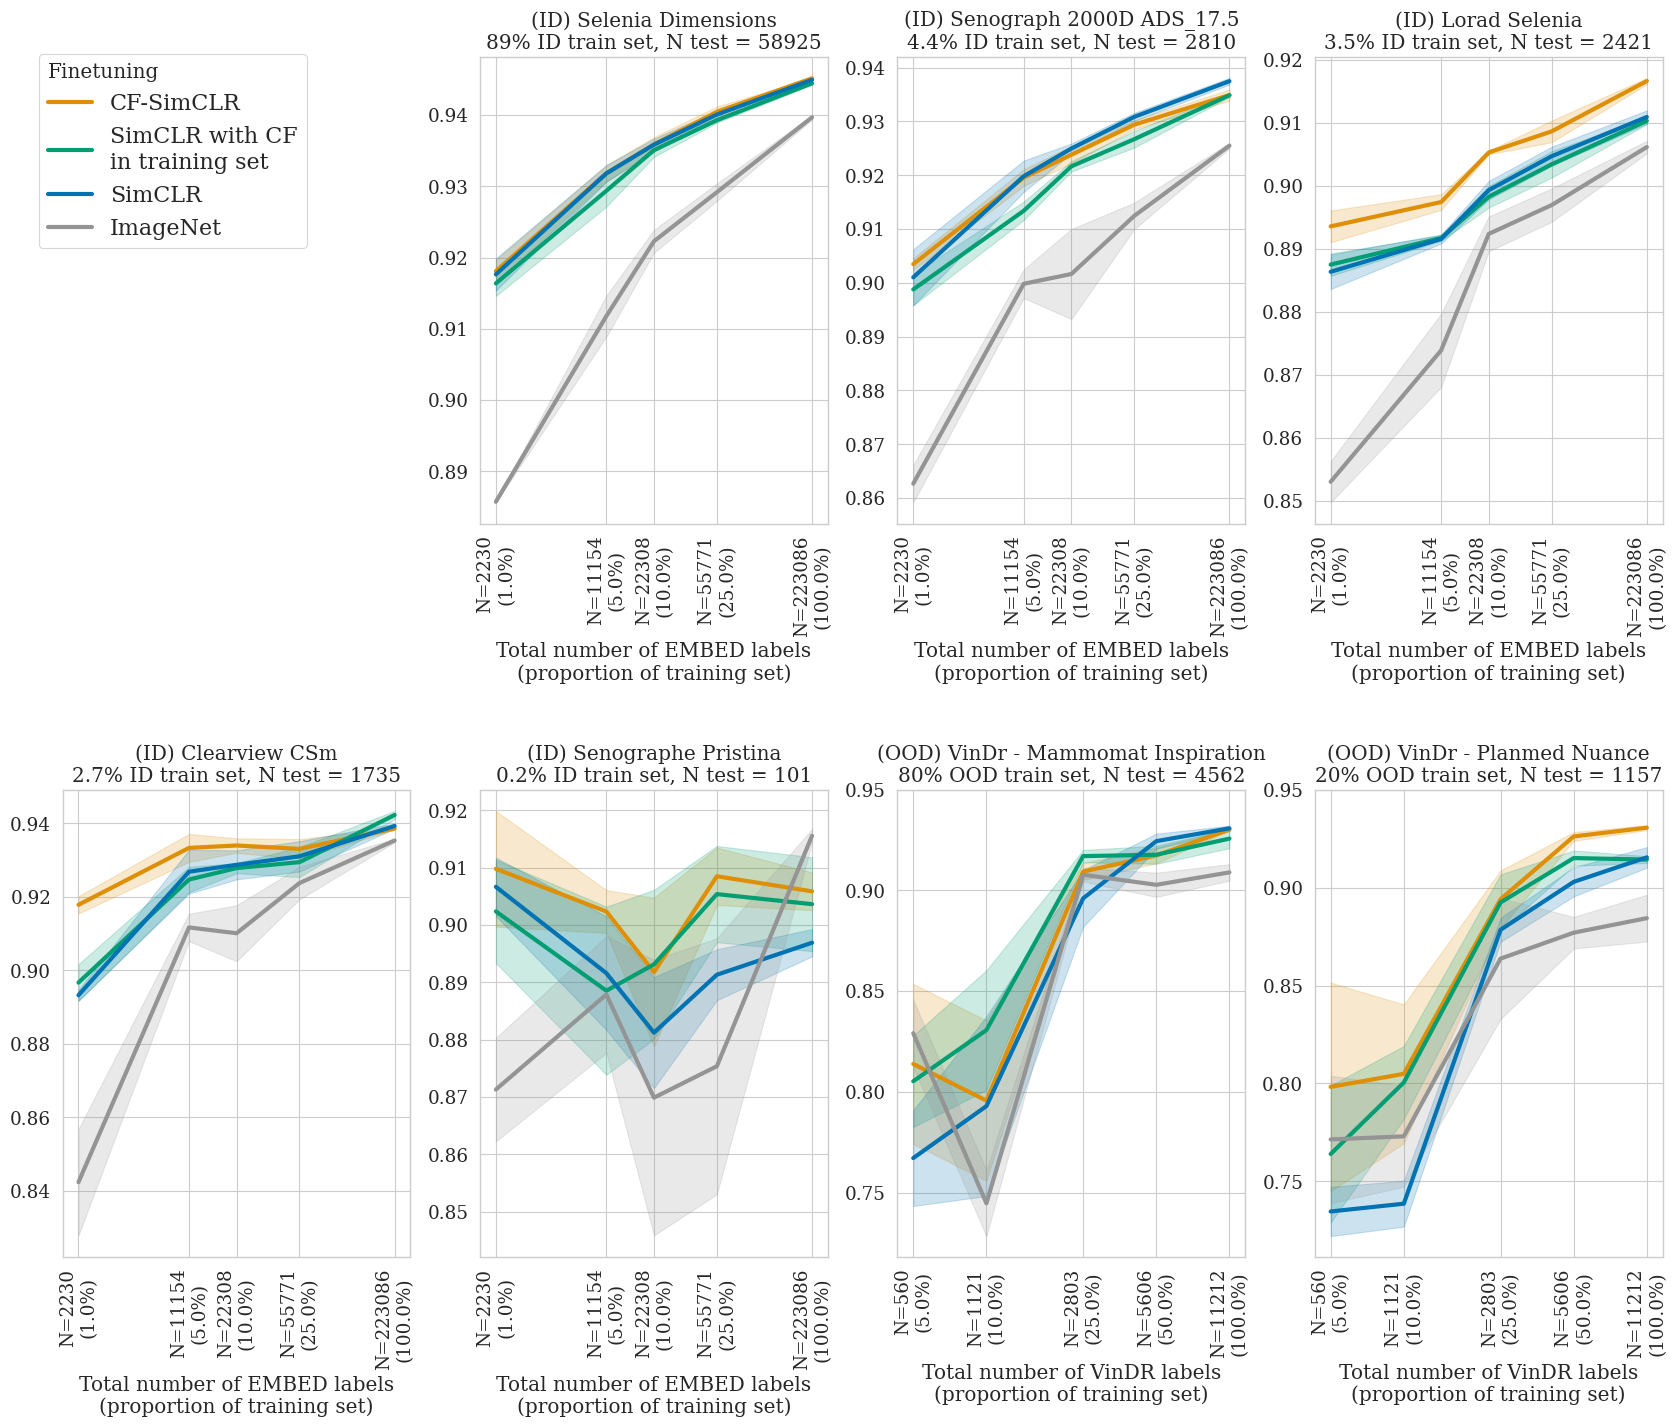

In [110]:
sns.set_theme(context="paper", style="whitegrid", font_scale=1.5)
matplotlib.rcParams["font.family"] = "serif"

for evaluation_type in ["Linear Probing", "Finetuning"]:
    df = pd.read_csv(f"../outputs/classification_tissueden_results_finetune2.csv")
    df["ctrain_label_prop"] = df.run_name.apply(extract_train_label_prop)
    df["Pretraining"] = df.run_name.apply(lambda x: extract_pretraining_type(x))
    df["Classifier"] = df.run_name.apply(lambda x: extract_finetuning_type(x))
    df = df.loc[df.Classifier == evaluation_type]
    df2 = df.dropna(subset=["ROC", "ctrain_label_prop"])
    xticks = [0.01, 0.05, 0.1, 0.25, 1.0]
    df2 = df2.loc[df2.ctrain_label_prop.isin(xticks)]
    f, ax = plt.subplots(2, 4, figsize=(20, 15))
    plt.subplots_adjust(
        left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.57
    )
    ax = ax.ravel()
    for i, model in enumerate(
        df2.sort_values(by="N_test", ascending=False)["Model Name"].unique(), 1
    ):
        df3 = df2.loc[df2["Model Name"] == model]
        df3['o'] = df3.Pretraining.apply(lambda x: order_dict[x])
        sns.lineplot(
            data=df3.sort_values(by='o'),
            x="ctrain_label_prop",
            y="ROC",
            hue="Pretraining",
            ax=ax[i],
            legend=False,
            **plt_kwargs,
        )
        ax[i].set_title(
            f"(ID) {model}\n{training_prop[model]}% ID train set, N test = {df3.N_test.unique()[0]}"
        )
        ax[i].set_xlabel("Total number of EMBED labels\n(proportion of training set)")
        n_label_train_total = 223086
        ax[i].set_xscale("log")

        xtickslabels = [
            f"N={int(n_label_train_total * x)}\n({x * 100}%)" for x in xticks
        ]
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels(xtickslabels, rotation=90)
        #ax[i].set_yticks([0.84, 0.86, 0.88, 0.90, 0.92, 0.94])
        if i > 0:
            ax[i].set_ylabel("")
        
        if evaluation_type == 'Linear Probing':
            if i == 1:
                ax[i].set_yticks([.91,.92,.93,.94])
            if i == 3:
                ax[i].set_yticks([.88,.89,.90,.91])

    df = pd.read_csv(f"../outputs/vindr2.csv")
    df["ctrain_label_prop"] = df.run_name.apply(extract_train_label_prop)
    df["Pretraining"] = df.run_name.apply(lambda x: extract_pretraining_type(x))
    df["Classifier"] = df.run_name.apply(lambda x: extract_finetuning_type(x))
    df = df.loc[df.Classifier == evaluation_type]
    df2 = df.dropna(subset=["ROC", "ctrain_label_prop"])
    xticks = [0.05, 0.1, 0.25, 0.5, 1.0]
    df2 = df2.loc[df2.ctrain_label_prop.isin(xticks)]
    df2 = df2.loc[df2["Model Name"] != "(OOD) VinDr"]
    for i, model in enumerate(
        df2.sort_values(by="N_test", ascending=False)["Model Name"].unique(), 6
    ):
        df3 = df2.loc[df2["Model Name"] == model]
        df3['o'] = df3.Pretraining.apply(lambda x: order_dict[x])
        sns.lineplot(
            data=df3.sort_values(by="o"),
            x="ctrain_label_prop",
            y="ROC",
            hue="Pretraining",
            ax=ax[i],
            legend=i == 7,
            **plt_kwargs,
        )
        modelname = model.replace('\n',' - ')
        ax[i].set_title(
            f"{modelname}\n{vindr_training_prop[model]}% OOD train set, N test = {df3.N_test.unique()[0]}"
        )
        ax[i].set_xlabel("Total number of VinDR labels\n(proportion of training set)")
        n_label_train_total = 11212
        ax[i].set_xscale("log")

        xtickslabels = [
            f"N={int(n_label_train_total * x)}\n({x * 100}%)" for x in xticks
        ]
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels(xtickslabels, rotation=90)
        ax[i].set_yticks([0.75, 0.80, 0.85, 0.90, 0.95])
        if i > 0:
            ax[i].set_ylabel("")
    ax[0].set_axis_off()
    ax[-1].legend(loc="upper left", bbox_to_anchor=(-3.7, 2.60), ncol=1, fontsize=16, title=evaluation_type, alignment='left')

    plt.savefig(f"embed_{evaluation_type}.pdf", bbox_inches="tight", dpi=300)
    plt.show()

## Chest X-ray results

/tmp/ipykernel_3845176/526484158.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['o'] = df3.Pretraining.apply(lambda x: order_dict[x])
/tmp/ipykernel_3845176/526484158.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['o'] = df3.Pretraining.apply(lambda x: order_dict[x])
/tmp/ipykernel_3845176/526484158.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

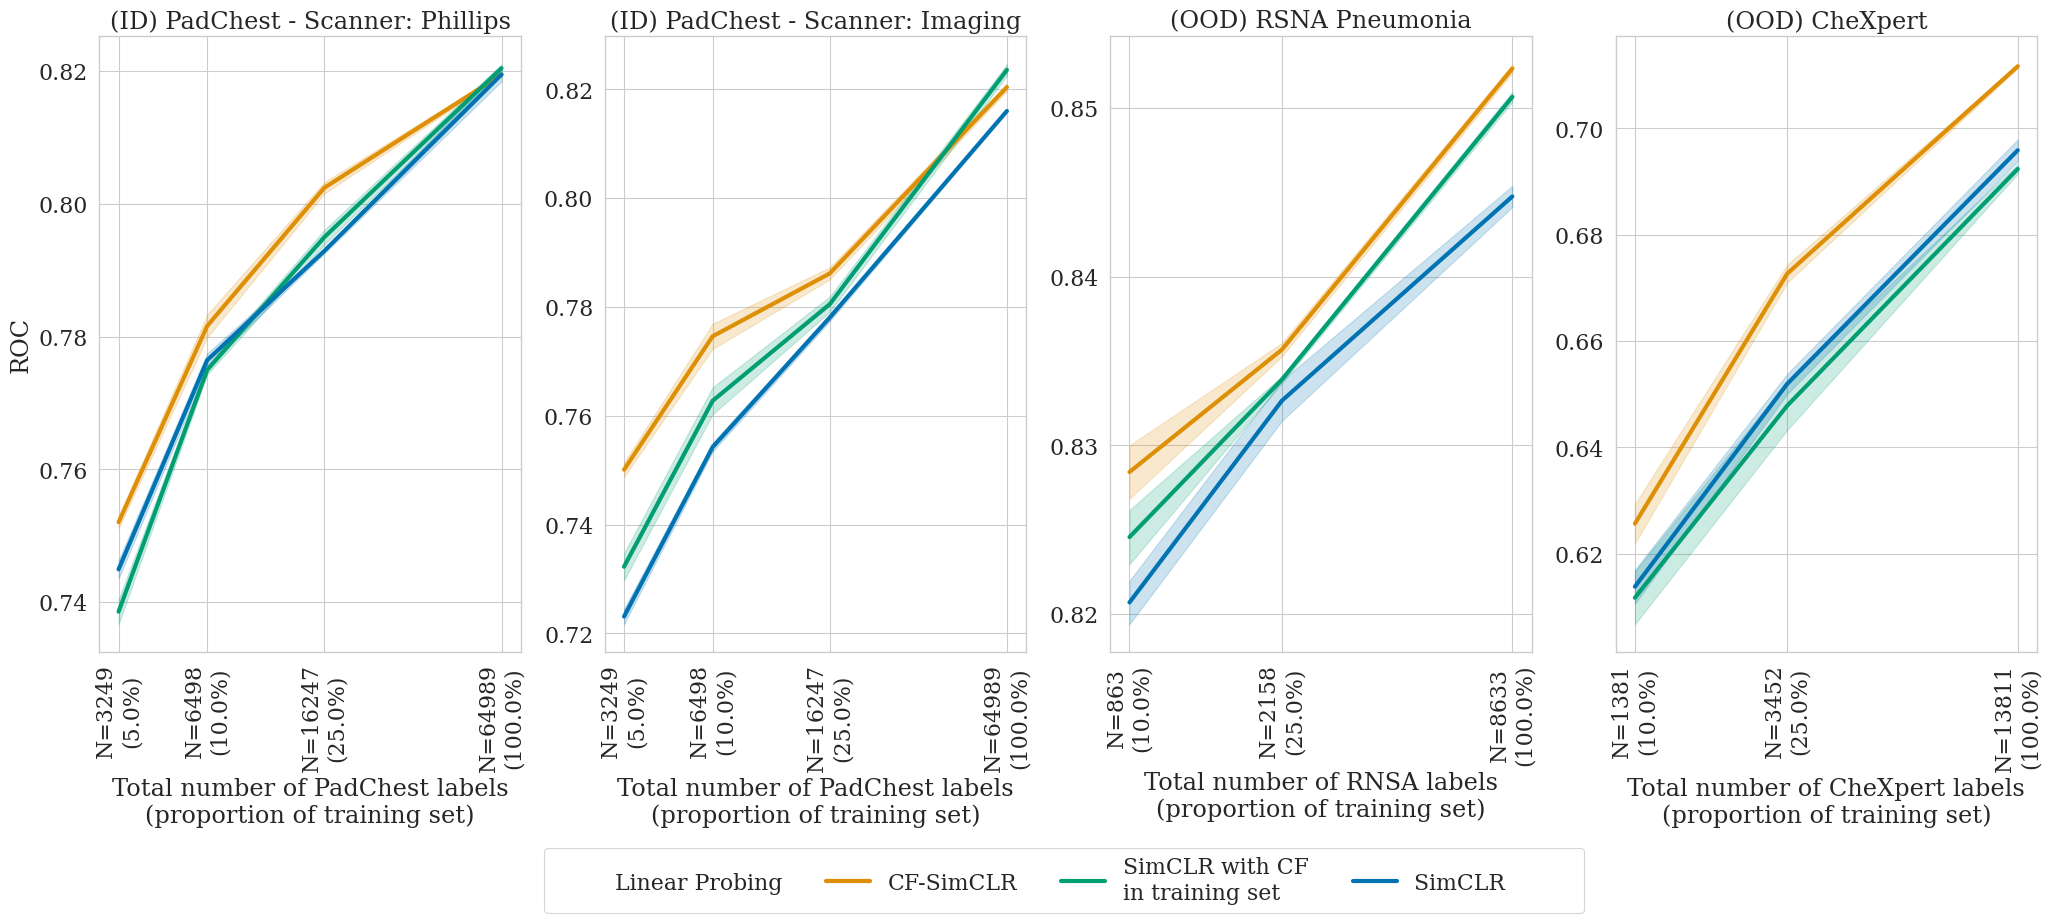

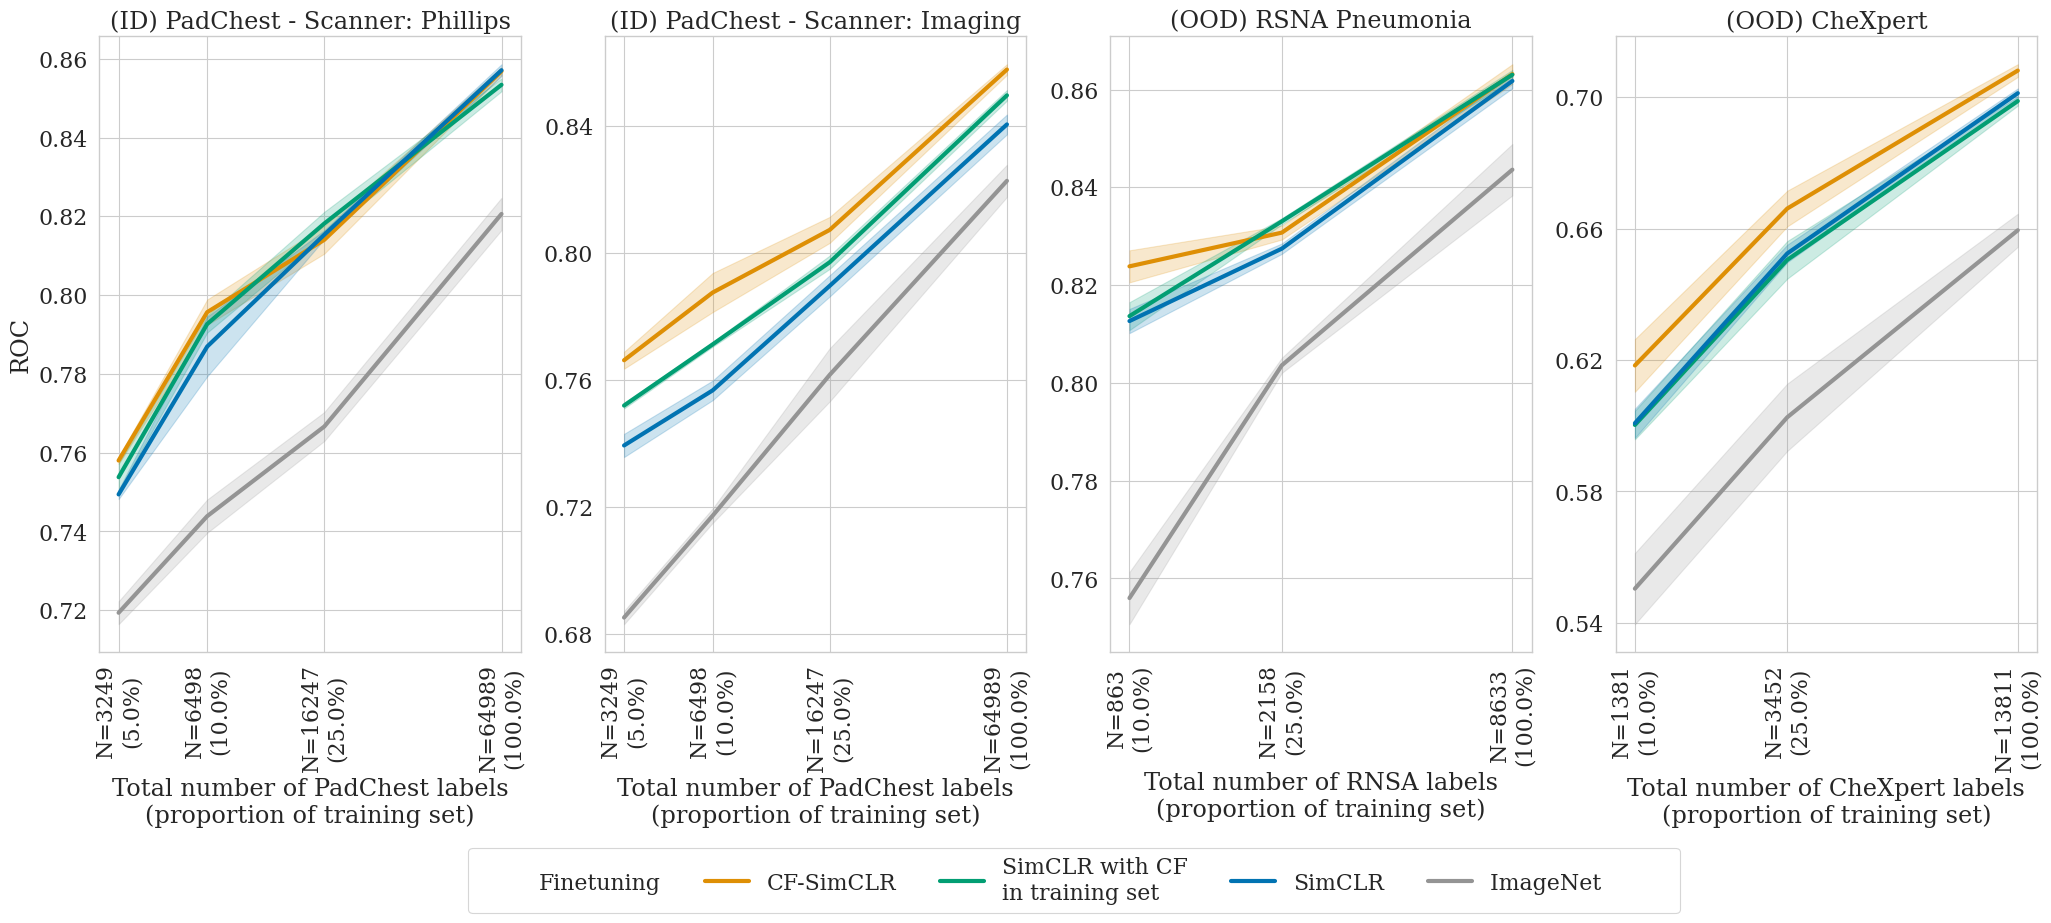

In [112]:
sns.set_theme(context="paper", style="whitegrid", font_scale=1.8)
matplotlib.rcParams["font.family"] = "serif"
for evaluation_type in ["Linear Probing", "Finetuning"]:
    xticks = [0.05, 0.1, 0.25, 1.0]

    df = pd.read_csv(f"../outputs/classification_padchestfinetunepneumo_results.csv")
    df["ctrain_label_prop"] = df.run_name.apply(extract_train_label_prop)
    df["Scanner"] = df["Scanner"].astype(str)
    df["Pretraining"] = df.run_name.apply(lambda x: extract_pretraining_type(x))
    df["Classifier"] = df.run_name.apply(lambda x: extract_finetuning_type(x))
    df = df.loc[df.ctrain_label_prop.isin(xticks)]
    df = df.loc[df.Classifier == evaluation_type]
    custom_order = [
        "ImageNet",
        "SimCLR",
        "SimCLR with CF\nin training set",
        "Counterfactual SimCLR",
    ]
    df.sort_values(
        by="Pretraining",
        inplace=True,
        key=lambda x: x.map({k: i for i, k in enumerate(custom_order)}),
    )
    f, ax = plt.subplots(1, 4, figsize=(25, 8))
    for i, s in enumerate(["0", "1"]):
        df3 = df.loc[df.Scanner == s]
        df3['o'] = df3.Pretraining.apply(lambda x: order_dict[x])
        sns.lineplot(
            data=df3.sort_values(by="o"),
            x="ctrain_label_prop",
            y="ROC",
            hue="Pretraining",
            ax=ax[i],
            legend=False,
            **plt_kwargs,
        )
        if s == "0":
            ax[i].set_title(f"(ID) PadChest - Scanner: Phillips")
        else:
            ax[i].set_title(f"(ID) PadChest - Scanner: Imaging")
            if evaluation_type == "Finetuning":
                ax[i].set_yticks([.68,.72,.76,.80,.84])

        ax[i].set_xlabel("Total number of PadChest labels\n(proportion of training set)")
        if i > 0:
            ax[i].set_ylabel("")

    df = pd.read_csv(f"../outputs/classification_rsna_results.csv")
    df["ctrain_label_prop"] = df.run_name.apply(extract_train_label_prop)

    n_label_train_total = 64989
    xtickslabels = [f"N={int(n_label_train_total * x)}\n({x * 100}%)" for x in xticks]
    ax[0].set_xscale("log")

    ax[0].set_xticks(xticks)
    ax[0].set_xticklabels(xtickslabels, rotation=90)
    ax[1].set_xscale("log")
    ax[1].set_xticks(xticks)
    ax[1].set_xticklabels(xtickslabels, rotation=90)

    xticks = [0.1, 0.25, 1.0]
    df["Scanner"] = df["Scanner"].astype(str)
    df["Pretraining"] = df.run_name.apply(lambda x: extract_pretraining_type(x))
    df["Classifier"] = df.run_name.apply(lambda x: extract_finetuning_type(x))
    df = df.loc[df.Classifier == evaluation_type]
    df = df.loc[df.ctrain_label_prop.isin(xticks)]
    df['o'] = df.Pretraining.apply(lambda x: order_dict[x])
    sns.lineplot(
        data=df.sort_values(by='o'),
        x="ctrain_label_prop",
        y="ROC",
        hue="Pretraining",
        ax=ax[-2],
        legend=False,
        **plt_kwargs,
    )

    ax[-2].set_ylabel("")
    ax[-2].set_xlabel("Total number of RNSA labels\n(proportion of training set)")
    ax[-2].set_title(f"(OOD) RSNA Pneumonia")
    n_label_train_total = 8633

    xtickslabels = [f"N={int(n_label_train_total * x)}\n({x * 100}%)" for x in xticks]
    ax[-2].set_xscale("log")
    ax[-2].set_xticks(xticks)
    ax[-2].set_xticklabels(xtickslabels, rotation=90)
    df = pd.read_csv(f"../outputs/classification_chexfinetunepneumo_results.csv")
    df["ctrain_label_prop"] = df.run_name.apply(extract_train_label_prop)
    df["Scanner"] = df["Scanner"].astype(str)
    df["Pretraining"] = df.run_name.apply(lambda x: extract_pretraining_type(x))
    df["Classifier"] = df.run_name.apply(lambda x: extract_finetuning_type(x))
    df = df.loc[df.ctrain_label_prop.isin(xticks)]
    df = df.loc[df.Classifier == evaluation_type]
    df['o'] = df.Pretraining.apply(lambda x: order_dict[x])
    sns.lineplot(
        data=df.sort_values(by="o"),
        x="ctrain_label_prop",
        y="ROC",
        hue="Pretraining",
        ax=ax[-1],
        legend=True,
        style='Classifier',
        **plt_kwargs,
    )
    ax[-1].set_ylabel("")

    if evaluation_type == "Linear Probing":
        ax[-2].set_yticks([0.82, .83, .84, .85])
    handles, labels = ax[-1].get_legend_handles_labels()
    handles = handles[:-2]
    labels = labels[:-2]
    labels[-1] += '          '
    labels[0] = evaluation_type

    if evaluation_type == "Linear Probing":
        ax[-1].legend(handles, labels, loc="upper left", bbox_to_anchor=(-2.57, -0.3), ncol=8) # title=evaluation_type, alignment='left'
    else:
        ax[-1].legend(handles, labels, loc="upper left", bbox_to_anchor=(-2.75, -0.3), ncol=8)
    ax[-1].set_xlabel("Total number of CheXpert labels\n(proportion of training set)")
    ax[-1].set_title(f"(OOD) CheXpert")
    n_label_train_total = 13811
    xtickslabels = [f"N={int(n_label_train_total * x)}\n({x * 100}%)" for x in xticks]
    ax[-1].set_xscale("log")
    ax[-1].set_xticks(xticks)
    ax[-1].set_xticklabels(xtickslabels, rotation=90)
    if evaluation_type == "Finetuning":
        ax[-1].set_yticks([.54,.58,.62,.66,.70])
    plt.savefig(f"xray_{evaluation_type.lower()}.pdf", bbox_inches="tight", dpi=300)